# DataCamp Certification Case Study

### Project Brief

Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 

You will need to present your findings in two formats:
- First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, the packages and libraries required to carry out data loading, manipulation and visualisation; data engineering and visualisation; model building and evaluation are imported . |

---

In [1]:
# Importing libraries that would be needed in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import eli5
from eli5.sklearn import PermutationImportance

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

<a id="two"></a>
## 2. Loading the Data and Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| This section of the project is dedicated to loading of the datasets from the `event_venues` csv files into a DataFrame.; Analysis of Null values, identifying of datatpyes and conversion to numerics|

---

In [2]:
# load the dataset as a dataframe
df = pd.read_csv('event_venues.csv')

For this project, Pandas library will be used to access and manipulate the datasets. Hence, datasets is loaded into df pandas dataframes. 
- A Dataframe is a native data structure of the Pandas library which provides easier and visually appealling means of handling data. <br /><br />

#### 2.1 Overview of the dataset

In [3]:
# display the first five rows of the dataset
df.head()

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False


To have a quick overview of the dataset, the DataFrame.head() pandas method was used to display the first five rows of the dataset. Although, the displayed result does not capture the entire features, but it is immediately obvious that many features including the target variable contain categorical data and few numerical data. Hence, the problem can be confidently classified as a Classification problem.
<br /><br /><br />

In [4]:
cat=['Loud music / events', 'Venue provides alcohol', 'Wi-Fi', 'supervenue', 'Promoted / ticketed events', 'Wheelchair accessible']
import dataframe_image as dfi
df_save = pd.DataFrame(df[cat].head(20))
df_styled = df_save.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"X_table.png")

C:\ProgramData\Anaconda3\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


In [5]:
# finding out how many enteries we have in our dataset
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')

There are 3910 rows, and 10 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


At a glance, it is clear our dataset has no `null` entry and it consist three type of datatypes, ranging from object, bool and numerical datatypes

In dealing with categorical data (object and bool datatypes), each type will be examined and dealt with as required

In [7]:
# listing the non-numeric datatypes
numerics = ['int64', 'float64']
print('This are columns that are non-numeric',
      [x for x in df.select_dtypes(exclude=numerics)])

# Columns that are object datatypes
print('This are columns that are object/character datatype(s)',
      [x for x in df.select_dtypes('object')])

# Columns that boolean datatypes
print('This are columns that are boolean/character datatype(s)',
      [x for x in df.select_dtypes('bool')])


This are columns that are non-numeric ['venue_name', 'Loud music / events', 'Wi-Fi', 'supervenue', 'Promoted / ticketed events', 'Wheelchair accessible']
This are columns that are object/character datatype(s) ['venue_name']
This are columns that are boolean/character datatype(s) ['Loud music / events', 'Wi-Fi', 'supervenue', 'Promoted / ticketed events', 'Wheelchair accessible']


In [8]:
# Examining the object datatype 'venue_name'
print(f'We have {df.venue_name.nunique()} unique numbers of venue in our dataset')

We have 1444 unique numbers of venue in our dataset


This shows that our dataset contain many duplicates or error of entry at data collection stage for each venues, let check and see some of the venues to understand the duplication problem<br><br>

#### 2.2 Dealing with duplicate in the dataset

In [9]:
# checking for 5 different and random venues entry informations
uniq_list = df.venue_name.unique()
np.random.seed(3)
temp_num = np.random.permutation(len(uniq_list))[:5]
for x in temp_num:
    display(df.loc[df['venue_name']==uniq_list[x]])

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
979,the gore hotel,False,1,True,False,8.000000,30,24.000000,False,False
1423,the gore hotel,False,1,True,False,15.000000,120,50.000000,False,False
1916,the gore hotel,False,1,True,False,35.045455,90,112.715867,False,False
1944,the gore hotel,False,1,True,False,8.000000,40,24.000000,False,False


,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
2032,imperial treasure fine chinese cuisine,False,1,True,False,10.000000,0,112.715867,False,True
2807,imperial treasure fine chinese cuisine,False,1,True,False,35.045455,0,112.715867,False,True
3541,imperial treasure fine chinese cuisine,False,1,True,False,35.045455,0,112.715867,False,True


,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
704,1 cornhill,False,1,True,False,35.045455,0,112.715867,False,False
1005,1 cornhill,False,1,True,False,35.045455,0,112.715867,False,False
1218,1 cornhill,False,1,True,False,35.045455,0,112.715867,False,False
1292,1 cornhill,False,1,True,False,35.045455,0,55.000000,False,False
1571,1 cornhill,False,1,True,False,35.045455,0,21.000000,False,False
1648,1 cornhill,False,1,True,False,35.045455,0,112.715867,False,False


,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
1952,the buckle factory,False,0,True,True,35.045455,60,112.715867,False,False


,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
89,beach blanket babylon,True,1,True,False,35.045455,100,112.715867,True,False
1407,beach blanket babylon,True,1,True,False,35.045455,0,112.715867,True,False
1851,beach blanket babylon,True,1,True,False,35.045455,35,112.715867,True,False


From the different venue shown above, it can be confirmed that the re-occurring of the venue name is definitely a duplication, since most of the features have similar values with respect to there venue name
- It would be best to group the dataset by there venue name and using;
	- mode value for all numerical datatypes and categorical datatypes

In [10]:
# creating a dictionary to determine which metrics to use on each column 
d = {}
for x in df.columns:
    if x == 'venue_name':
        continue
    if df[x].dtype == 'int64' or  df[x].dtype == 'float64':
        d[x] = pd.Series.mode
    else:
        d[x] = pd.Series.mode
d

{'Loud music / events': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'Venue provides alcohol': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'Wi-Fi': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'supervenue': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'U-Shaped_max': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'max_standing': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'Theatre_max': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'Promoted / ticketed events': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>,
 'Wheelchair accessible': <function pandas.core.series.Series.mode(self, dropna: 'bool' = True) -> 'Series'>}

In [11]:
# Creating a new dataframe by grouping by the venue_name and passing the dictionary above for aggregation
df_grp = df.groupby('venue_name').agg(d)
df_grp

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
venue_name,,,,,,,,,
1 cornhill,False,1,True,False,35.045455,0,112.715867,False,False
1 king street,False,0,True,False,35.045455,0,112.715867,False,False
1 king william street,False,1,True,False,35.045455,0,112.715867,False,False
1 wimpole street,False,1,True,False,35.045455,0,"[80.0, 112.7158671586716]",True,True
100 barrington,False,1,True,False,35.045455,200,112.715867,False,True
...,...,...,...,...,...,...,...,...,...
zapspace trampoline park,True,0,True,False,35.045455,80,112.715867,False,False
zentar uk,False,0,True,False,35.045455,0,112.715867,False,False
zinnia gardens,False,1,True,False,35.045455,500,500.0,False,False


Since all categorical datatype in our dataset are boolean except for the 'venue_name'
- It best to replace all True with a value of One (1) and False with a value of Zero (0)
- The venue_name will be left as index and not used or anaylze further.
- Applying mode to our numeric datatype and minimum value, where mode is not visible

It also worth noting that we know have 1444 rows which equal means we have 1444 venues in our new modified dataset<br><br>

In [12]:
# Checking the new dataframe to confirm Dtype
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 1 cornhill to {10-11} carlton house terrace
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Loud music / events         1444 non-null   bool  
 1   Venue provides alcohol      1444 non-null   int64 
 2   Wi-Fi                       1444 non-null   object
 3   supervenue                  1444 non-null   bool  
 4   U-Shaped_max                1444 non-null   object
 5   max_standing                1444 non-null   object
 6   Theatre_max                 1444 non-null   object
 7   Promoted / ticketed events  1444 non-null   bool  
 8   Wheelchair accessible       1444 non-null   object
dtypes: bool(3), int64(1), object(5)
memory usage: 83.2+ KB


* Some of our categorical data turn into object instead of remaining as a 'bool'
    - will need to convert them back to `bool` and hot-code them into numeric datatype
* Also our numeric datatype turn to object
    - Will convert to numeric by extracting the minimum or the first value of the each list
    - We also round down each value to integer, since it more realistic to have integer as capacity<br><br>

#### 2.3 Converting all features except `venue_name` into `numerics`

In [13]:
# extracting the list of columns we need to convert to numeric
bool_list = [x for x in df_grp.select_dtypes(exclude=numerics)]
df_grp_mod = df_grp.copy()

#looping through the list above to convert them to numeric
for x in bool_list:
    if df_grp_mod[x].dtype == 'bool':
        df_grp_mod[x] = df_grp_mod[x].replace({True: 1, False: 0})
# working seperately to convert the bool turn object into bool then hot-code to numeric
    else:        
        df_grp_mod[x] = df_grp_mod[x].astype(str)
        df_grp_mod[x] = df_grp_mod[x].apply(lambda y: y.replace('[False  True]', 'False'))
        df_grp_mod[x] = df_grp_mod[x].replace({'True': 1, 'False': 0})
        
# extracting the list of formal numeric turn object after applying 'mode'
obj_list = [x for x in df_grp_mod.select_dtypes('object')]

#looping through the list above to convert them to numeric
for x in obj_list:
    df_grp_mod[x] = df_grp_mod[x].str.extract('(\d+)')
    df_grp_mod[x] = df_grp_mod[x].astype(int)


In [14]:
df_grp_mod.head()

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
venue_name,,,,,,,,,
1 cornhill,0,1,1,0,35,0,112,0,0
1 king street,0,0,1,0,35,0,112,0,0
1 king william street,0,1,1,0,35,0,112,0,0
1 wimpole street,0,1,1,0,35,0,80,1,1
100 barrington,0,1,1,0,35,200,112,0,1


Now that we have all our feaures as numeric datatype, we can go on to explore ourdataset

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, analysis of each variable in the dataframe was carried out. Each variable was analysed individually and in respect to how they relate with each other to affect the target variable. Outliers and the relative importance of each feature was also observed.
|

---


In [15]:
# Seperating predictors from response variable
X = df_grp_mod.drop('Wheelchair accessible', axis=1)
y = df_grp_mod[['Wheelchair accessible']]

#### 3.1 Checking metrics of each features

In [16]:
# Checking metrics of dataset
df_grp_mod.describe().T

,count,mean,std,min,25%,50%,75%,max
Loud music / events,1444.0,0.357341,0.479382,0.0,0.0,0.0,1.0,1.0
Venue provides alcohol,1444.0,0.678670,0.467149,0.0,0.0,1.0,1.0,1.0
Wi-Fi,1444.0,0.909280,0.287310,0.0,1.0,1.0,1.0,1.0
supervenue,1444.0,0.067175,0.250411,0.0,0.0,0.0,0.0,1.0
U-Shaped_max,1444.0,34.423823,25.633033,1.0,35.0,35.0,35.0,900.0
max_standing,1444.0,86.104571,215.289721,0.0,0.0,40.0,100.0,5000.0
Theatre_max,1444.0,103.126731,131.255428,1.0,80.0,112.0,112.0,4000.0
Promoted / ticketed events,1444.0,0.382271,0.486111,0.0,0.0,0.0,1.0,1.0
Wheelchair accessible,1444.0,0.448061,0.497467,0.0,0.0,0.0,1.0,1.0


`U-Shaped_max, max_standing and Theatre_max` seems susceptible to outliers. <br><br>

#### 3.2 Visualizing the distribution of each features

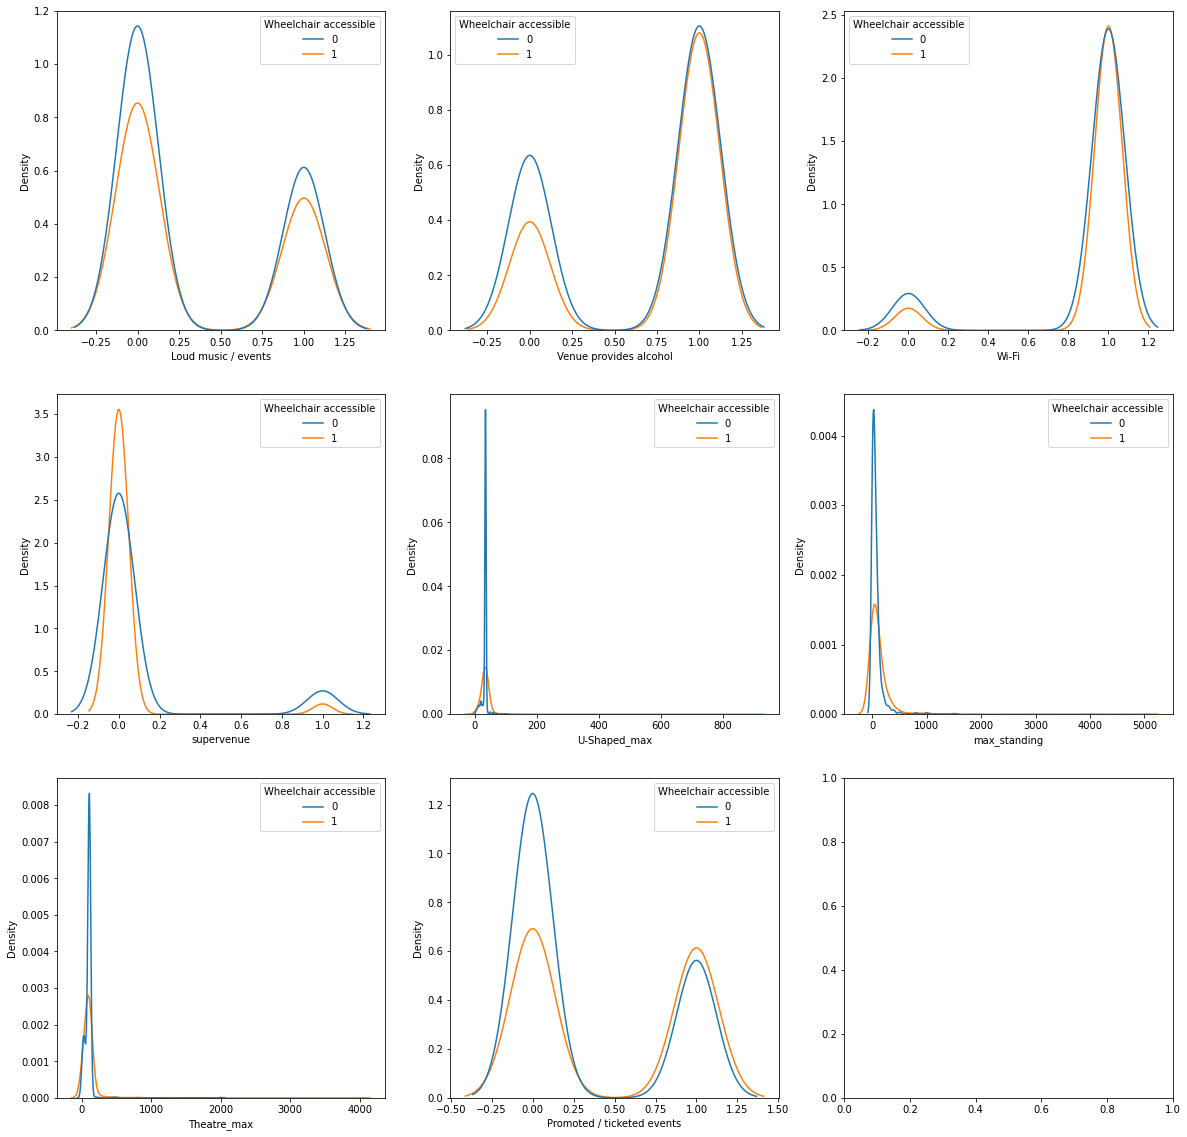

In [17]:
# Looking at the distribution of each features
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.ravel()
for index, x in enumerate((X.columns)):
    sns.kdeplot(x=X[x], hue=y['Wheelchair accessible'], ax=ax[index])
# plt.show()

From the histrogram distribution, we had two category of visual
- The visual with two peak are from our categorical data turned numerical, this is expected, since it consist of binary numbers
    - There skewness is not dominant to a either left or right
    - Venue that are not `supervenue` and those that host `Promotion events` tend to have `wheelchair accessibility`
- The numerical data types are all positively skewed, which shows that only few of our venue/event centers are very big; having attribute of large `U-Shaped_max`, `max_standing` and `Theatre_max`
    - This big venues tail are lace with `yellow line` showing that they have `wheelchair accessibility`<br><br>


#### 3.3 Checking for Outliers

In [18]:
#checking for outliers
X.kurtosis(numeric_only=True).to_frame()

,0
Loud music / events,-1.647061
Venue provides alcohol,-1.415205
Wi-Fi,6.148092
supervenue,9.997345
U-Shaped_max,906.314776
max_standing,268.692036
Theatre_max,573.341030
Promoted / ticketed events,-1.767185


The list above shows that `U-Shaped_max, max_standing and Theatre_max` consist of outliers as suspected

In [19]:
X.skew(numeric_only=True).to_frame()

,0
Loud music / events,0.596005
Venue provides alcohol,-0.766001
Wi-Fi,-2.852995
supervenue,3.461719
U-Shaped_max,27.351199
max_standing,13.706014
Theatre_max,21.070526
Promoted / ticketed events,0.485041


The skew list above further confirm the skewness of all our features, while specifying whether they are positively skewed or negatively skewed <br><br>

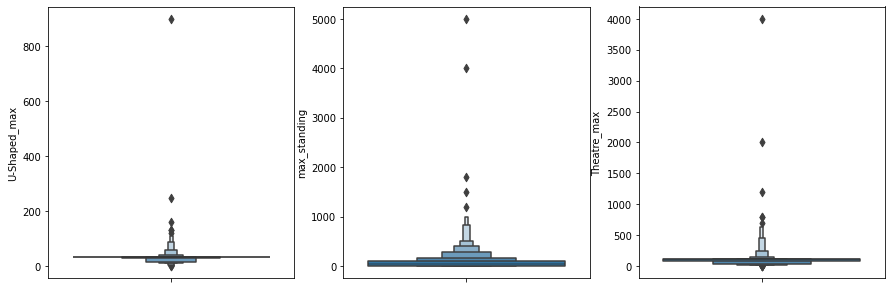

In [20]:
numeric_list = [x for x in df.select_dtypes(numerics)]
# Using visual to check for outliers
fig, ax = plt.subplots(1,3, figsize=(15,5))
for index, coln in enumerate(df_grp_mod[numeric_list[1:]].columns):
    sns.boxenplot(y=coln, data=df_grp_mod, ax=ax[index])
plt.savefig('boxplot.png', bbox_inches='tight')

There is strong precense of outliers in our numeric datatype and they need to be remove to have a better model<br><br>

#### 3.4 Relationship and correlation
 Checking the relationship of each categorical feature with our target variable `Wheelchair accessible`<br><br>

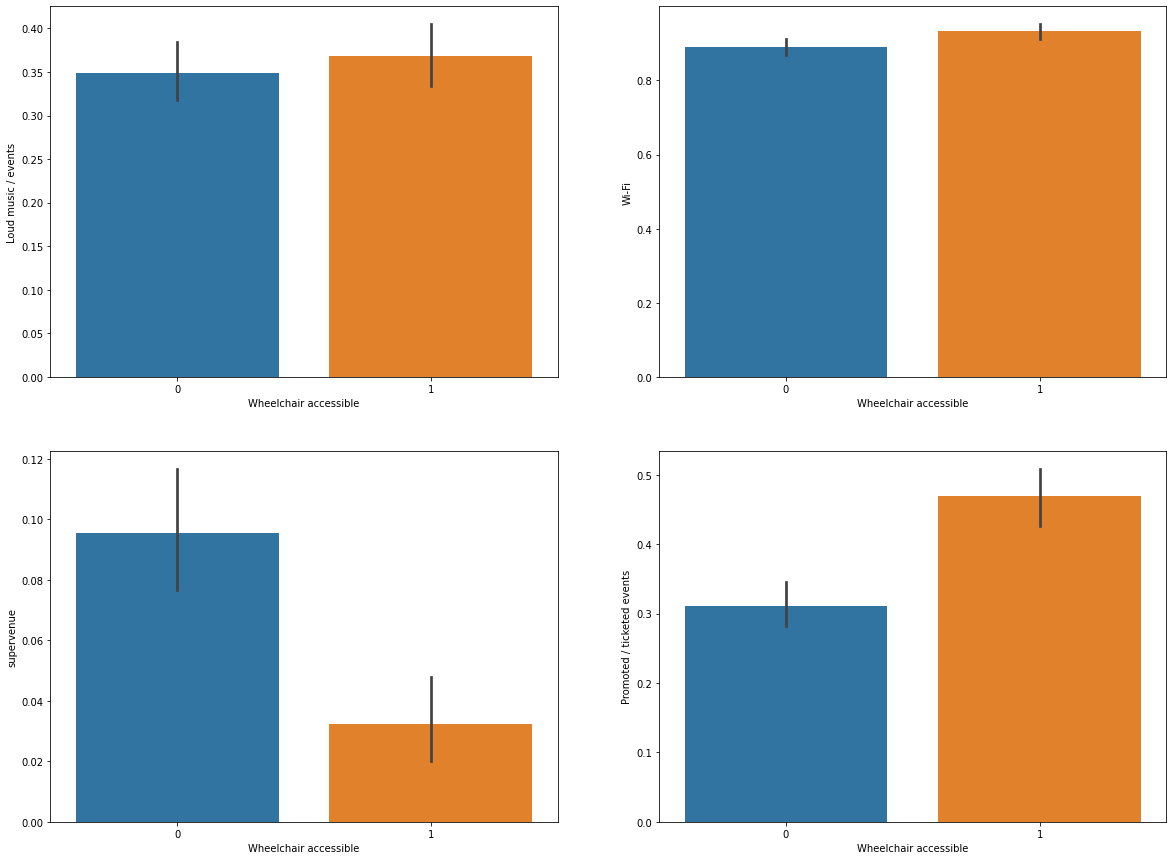

In [21]:
# generating list for our categorical features
cat_list = [x for x in df_grp_mod.columns[:-1] if x not in numeric_list]

# Ploting a barchart
fig, ax = plt.subplots(2, 2, figsize=(20,15))
ax = ax.ravel()
for x, column in enumerate(cat_list):
    sns.barplot(y=df_grp_mod[column], x=df_grp_mod['Wheelchair accessible'], ax=ax[x])

- Event center that qualify as `super venue` tend not to have Wheelchair Ramps
- Also event center that hosts `promoted/ticket events` are more likely to have Wheelchair Ramps

In [22]:
# Instantiating the numeric list in the dataset
numeric_list = ['U-Shaped_max', 'max_standing', 'Theatre_max']

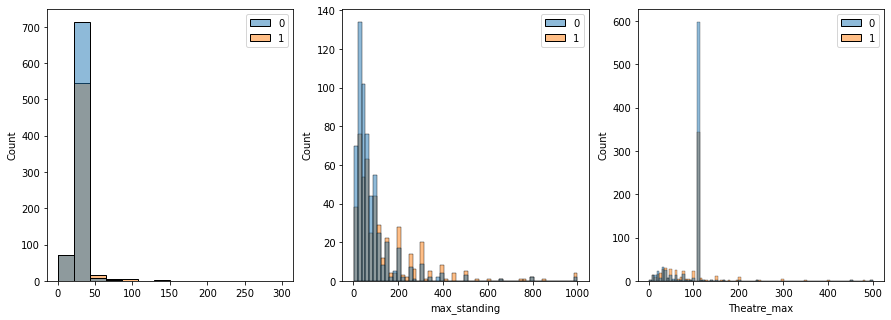

In [23]:
# Ploting a barchart
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=False)
# for x, column in enumerate(numeric_list):
y_axis = df_grp_mod['Wheelchair accessible']
sns.histplot(x=df_grp_mod['U-Shaped_max'].values.ravel(), hue=y.values.ravel(), ax=ax[0], binrange=(1,300))
sns.histplot(x=df_grp_mod['max_standing'], hue=y.values.ravel(), ax=ax[1], binrange=(1,1000))
sns.histplot(x=df_grp_mod['Theatre_max'], hue=y.values.ravel(), ax=ax[2], binrange=(1,500))
plt.savefig('test.png', bbox_inches='tight')
plt.show()

The histogram with the response/target variable shows us that `Wheelchair accessibility` is more available for bigger venue with respect to higher `U-Shaped_max, max_standing and Theatre_max` capacities 

In [24]:
temp_list = [x for x in X.columns if x not in numeric_list]

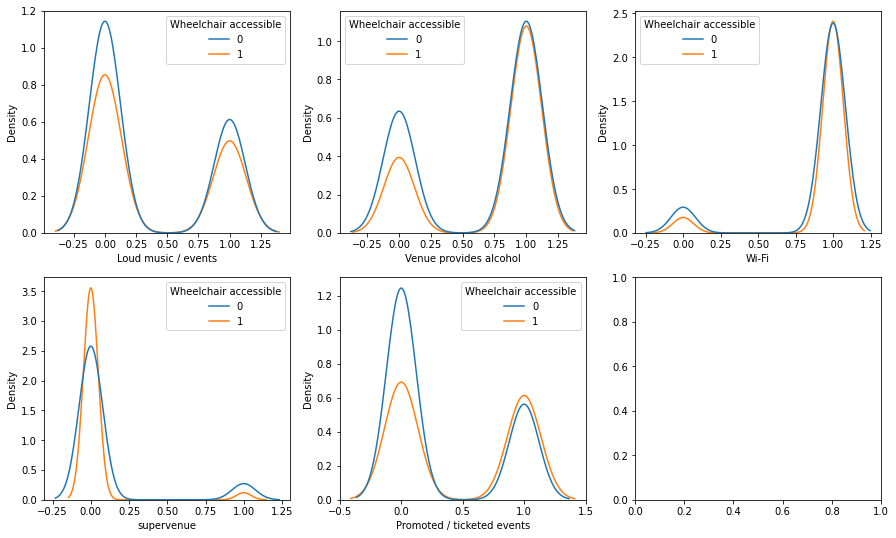

In [25]:
# Looking at the distribution of each categoricalfeatures
fig, ax = plt.subplots(2,3, figsize=(15,9))
ax = ax.ravel()
for index, x in enumerate(X[temp_list]):
    sns.kdeplot(x=X[x], hue=y['Wheelchair accessible'], ax=ax[index])
plt.savefig('test1.png', bbox_inches='tight')
plt.show()

In [26]:
numeric_list

['U-Shaped_max', 'max_standing', 'Theatre_max']

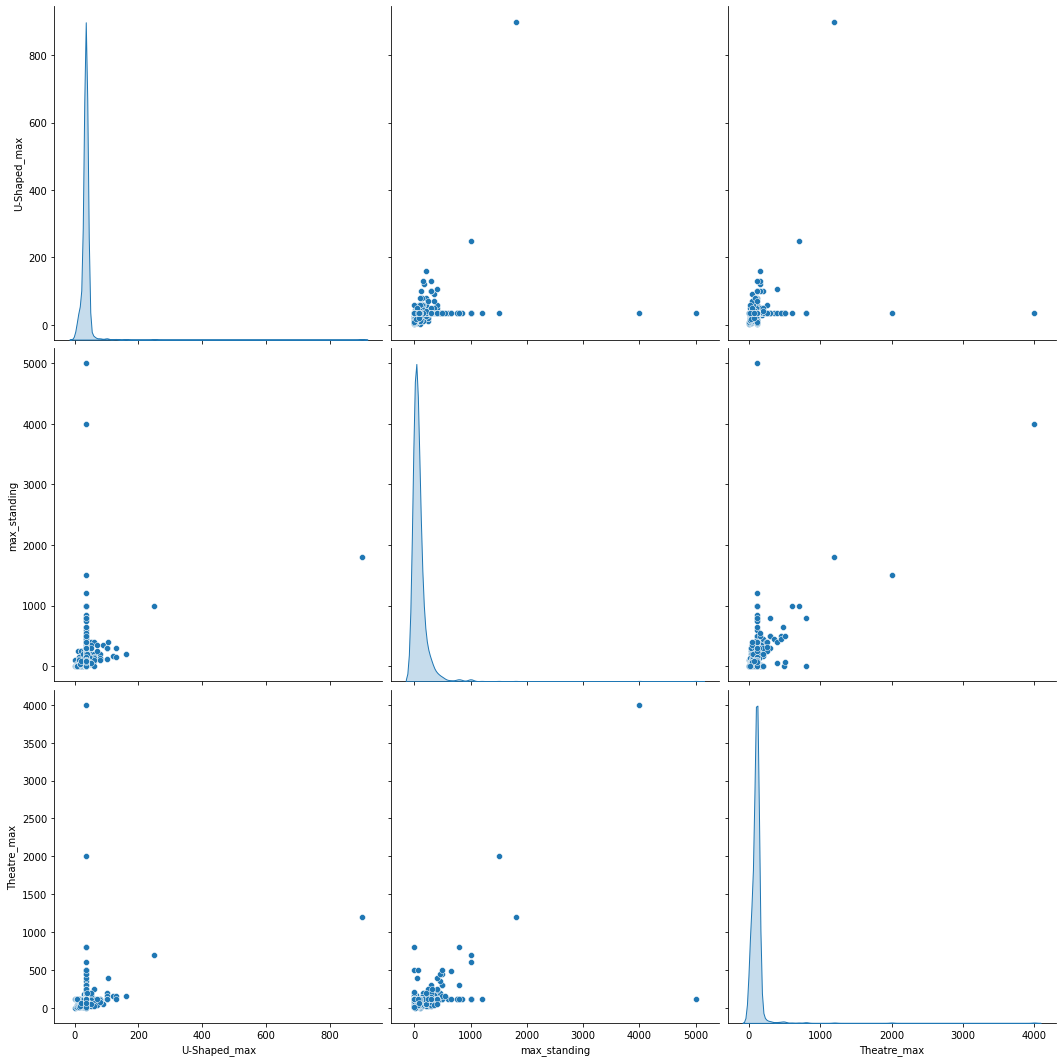

In [27]:
# Investigating further for features that are numerical
sns.pairplot(X[numeric_list], diag_kind='kde',height=5);

- The pair plot diagonal plot shows again the skewness of our non-categorical features are positively skewness
- `U-Shaped_max` is not correlated with the other two features, while `max_standing` and `Theatre_max` are fairly correlated

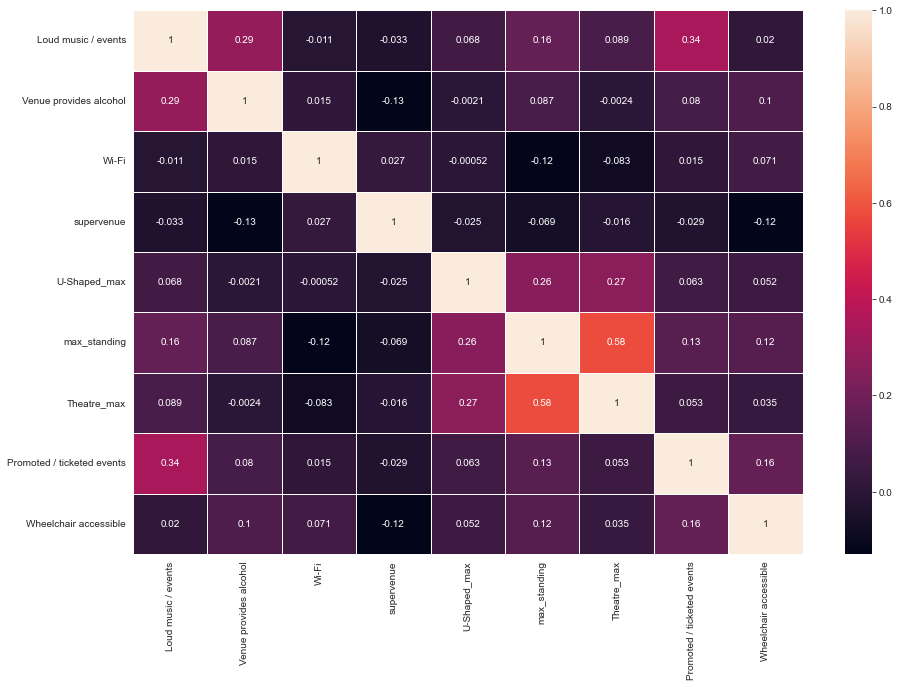

In [28]:
# correlation heatmap
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot(111);
sns.heatmap(df_grp_mod.corr(), annot=True, linewidths=.5)
plt.savefig('corr.png', bbox_inches='tight');

The heat map further confirm that most of our features are not correlated with each other, only `max_standing` and `Theatre_max` are moderately correlated

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| This section contains removing outliers. It also entails the engineering of some features and the dropping of some - as identified in the EDA phase. |

---

#### 4.1 Feature Engineering

In [29]:
X_mod = X.copy()
X_mod['total_capcity'] = X_mod['U-Shaped_max'] * X_mod['max_standing'] + X_mod['Theatre_max']


#### 4.2 Statistical Relevance of Predictors

In [30]:
temp_df = pd.concat([X_mod, y], axis=1)
# Calculate correlations between predictor variables and the target variable
corrs = temp_df.corr()['Wheelchair accessible'].sort_values(ascending=False)
corrs = corrs[1:]
corrs

Promoted / ticketed events    0.162401
max_standing                  0.122776
Venue provides alcohol        0.104074
Wi-Fi                         0.071255
total_capcity                 0.055822
U-Shaped_max                  0.051672
Theatre_max                   0.034833
Loud music / events           0.019762
supervenue                   -0.124958
Name: Wheelchair accessible, dtype: float64

The correlation values indicates that, individually, no feature shares a linear relationship with the target variable. A visual overview might be more intuitive to consider in a view to affirm the lack of relationship.
<br /><br />

Since, the relationship between the predictors and target variable can be not be determined via correlation, P_value was used in an attempt to create heirachy among the features in terms of relevance to the target variable.

In [31]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index]
for col in column_titles:
    p_val = round(pearsonr(X_mod[col], y['Wheelchair accessible'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
print('P_value heirachy')
df_cp_sorted


P_value heirachy


,Correlation_Coefficient,P_Value
Promoted / ticketed events,0.162401,0.000000
supervenue,-0.124958,0.000002
max_standing,0.122776,0.000003
Venue provides alcohol,0.104074,0.000074
Wi-Fi,0.071255,0.006753
total_capcity,0.055822,0.033916
U-Shaped_max,0.051672,0.049631
Theatre_max,0.034833,0.185865
Loud music / events,0.019762,0.453026


Using the Pearsonr method of using P_value to test the hypothesis of each features being a good predictors

In [32]:
# Using the threshold of < 0.05
corr_Pvalue = df_cp_sorted[df_cp_sorted['P_Value'] < 0.05]
print('list that makes the threshold')
corr_Pvalue

list that makes the threshold


,Correlation_Coefficient,P_Value
Promoted / ticketed events,0.162401,0.000000
supervenue,-0.124958,0.000002
max_standing,0.122776,0.000003
Venue provides alcohol,0.104074,0.000074
Wi-Fi,0.071255,0.006753
total_capcity,0.055822,0.033916
U-Shaped_max,0.051672,0.049631


From the table above we are going to be dropping `Theatre_max`, `Loud music / events` since they are not statistically significant, using a threshold of 0.05 P_value

In [33]:
# Modifiying the predictors to only include the list above
X_mod = X_mod[corr_Pvalue.index]

#### 4.3 Handling Outliers

In [34]:
# Merging the X and y dataset
temp_df = pd.concat([X_mod, y], axis=1)

# A for loop that iterates through the outlier varaible (outlier_df) and remove the affected rows
for x in['U-Shaped_max', 'max_standing']:
    Q1 = np.percentile(temp_df[x], 25.0)
    Q3 = np.percentile(temp_df[x], 75.0)
    IQR = Q3 - Q1
    df_sub1 = temp_df[temp_df[x] > Q3 + 1.5*IQR]
    df_sub2 = temp_df[temp_df[x] < Q1 - 1.5*IQR]
    temp_df.drop(df_sub1.index, inplace=True)
    
# Checking to see number of rows left in our training dataset    
print(f'We have {temp_df.shape[0]} rows left to train and validate')


We have 1279 rows left to train and validate


#### 4.4 Variable selection using Permutation Importance

In [35]:
# Spliting the final engineered dataset into predictors and target
X_final = temp_df.drop('Wheelchair accessible', axis=1)
y_final = temp_df[['Wheelchair accessible']]

# Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, train_size=0.8, random_state=42)



In [36]:
# We run the model in order to further guage importance of each predictors
my_model = RandomForestClassifier(max_features='log2', max_leaf_nodes=5, min_weight_fraction_leaf=0.01,
                                  random_state=0).fit(X_train, y_train.values.ravel())

#checking the metrics to see how we perform
pred_train = my_model.predict(X_train)
pred_valid = my_model.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_train))
print("MAE: ", metrics.mean_absolute_error(y_test, pred_valid))

MAE:  0.36656891495601174
MAE:  0.390625


The dataset was fitted using randomForest to use the feature importance to check the weight of each features <br><br>

In [37]:
# permutation importance of our features
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
perm_html = eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=50)
perm_html

Weight,Feature
0.0211 ± 0.0189,total_capcity
0.0156 ± 0.0070,Promoted / ticketed events
0.0133 ± 0.0201,max_standing
0.0094 ± 0.0106,Venue provides alcohol
0.0055 ± 0.0136,U-Shaped_max
0.0008 ± 0.0031,Wi-Fi
-0.0016 ± 0.0106,supervenue


- `supervenue` and `Wi-Fi` features will be removed since they have minimal or negative impact on our model<br><br>

In [38]:
# dropping the columns that are not contributing to the model
X_final.drop(['Wi-Fi', 'Venue provides alcohol'], axis=1, inplace=True)

In [39]:
# Spliting new modifed dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, train_size=0.8, random_state=0)
# We run the model in order to further guage importance of each predictors
my_model = RandomForestClassifier(max_features='log2', max_leaf_nodes=5, min_weight_fraction_leaf=0.01,
                                  random_state=0).fit(X_train, y_train.values.ravel())

#checking the metrics to see how we perform
pred_train = my_model.predict(X_train)
pred_valid = my_model.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_train))
print("MAE: ", metrics.mean_absolute_error(y_test, pred_valid))



MAE:  0.3616813294232649
MAE:  0.359375


- There is improvement in our model, which justify removing those features above

In [40]:
# checking permutation importance again
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
perm_html = eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=50)
perm_html

Weight,Feature
0.0477 ± 0.0406,Promoted / ticketed events
0.0219 ± 0.0153,max_standing
0.0211 ± 0.0207,total_capcity
0.0063 ± 0.0136,supervenue
0.0047 ± 0.0134,U-Shaped_max


The weighted function (values) shows all features are now good for the model, therefore the above features will be used to model going forward

In [41]:
cat=['max_standing', 'total_capcity', 'supervenue', 'Promoted / ticketed events', 'U-Shaped_max']
import dataframe_image as dfi
df_save = pd.DataFrame(X_final[cat].head(20))
df_styled = df_save.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"X_fiinal_table.png")

C:\ProgramData\Anaconda3\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, several models were created and evaluated using the engineered dataset. The models created includes Logistics RegressionCV model, RandomForest Classifier, DecisionTree Classifier, and XGBoost classifier model|

---

In [42]:
# Creating a function that check metrics
def metrics_fn(X, y, model, predict):
    mae = round(metrics.mean_absolute_error(y, predict), 2)
    acc = round(model.score(X, y), 2)
    r2 = round(metrics.r2_score(y, predict), 4)
    return mae, acc, r2

#### 5.1. Logisic RegressorCV Model

In [43]:
# creating and fitting a logistic regression model
model_log = LogisticRegressionCV(random_state=42)
model_log.fit(X_train, y_train.values.ravel())
pred_train, pred_test = model_log.predict(X_train), model_log.predict(X_test)

#calling the metric function
train_met = metrics_fn(X_train, y_train, model_log, pred_train)
test_met = metrics_fn(X_test, y_test, model_log, pred_test)
logr_result = pd.DataFrame([train_met, test_met], index=['Training', 'Testing'], columns=['MAE', 'ACC', 'R2'])
logr_result

,MAE,ACC,R2
Training,0.39,0.61,-0.6068
Testing,0.36,0.64,-0.5157


The Logistic Regression model has a fairly good performance on the training dataset and validation set indicating that it generalize fairly well. There is no evidence or indication of overfitting or underfitting of the model. Although, there is room for improvement of the predictive powerand redution of the MAE. <br><br>

#### 5.2. DecisionTreeClassifier Model

In [44]:
# Function for creating XGBRegressor
def score_dataset_dtr(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeClassifier(max_features='log2', max_leaf_nodes=4, random_state=0)
    model.fit(X_train, y_train.values.ravel())
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(X_train, y_train, model, pred_train)
    valid_met = metrics_fn(X_test, y_test, model, pred_test)
    return train_met, valid_met, pred_train, pred_valid, model

print("METRICS for Decision Tree Classifier")
dtr_model = score_dataset_dtr(X_train, X_test, y_train, y_test)
dtr_result = pd.DataFrame(dtr_model[:2], index=['Training', 'Validation'], columns=['MAE', 'ACC', 'R2'])
dtr_result

METRICS for Decision Tree Classifier


,MAE,ACC,R2
Training,0.39,0.61,-0.6188
Validation,0.36,0.64,-0.5157


The Decision tree model has a good performance on the training dataset and validation. There is no evidence or indication of overfitting of the model. Although, both logistics and DesicionTree have similar metrics scores, there is still room for improvement. <br><br>

#### 5.3. Random Forest Classifier Model

In [45]:
# Function for creating RandomForest
def score_dataset_rf(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(random_state=50)
    model.fit(X_train, y_train.values.ravel())
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(X_train, y_train, model, pred_train)
    valid_met = metrics_fn(X_test, y_test, model, pred_test)
    return train_met, valid_met, pred_train, pred_valid, model

# calling the function
print("METRICS for Random Forest Classifier")
rf_model = score_dataset_rf(X_train, X_test, y_train, y_test)
rf_result = pd.DataFrame(rf_model[:2], index=['Training', 'Testing'], columns=['MAE', 'ACC', 'R2'])
rf_result

METRICS for Random Forest Classifier


,MAE,ACC,R2
Training,0.21,0.79,0.1546
Testing,0.36,0.66,-0.5157


The RandomForest tree model had a better performance on the training dataset and validation set indicating that it generalize better. Since accuracy score for both `training` and `validation` are close, there is no evidence or indication of overfitting or underfitting of the model.<br><br>

#### 5.4. XGBoost Classifier Model

In [46]:
# Function for creating XGBClassifier
def score_dataset_xgb(X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(eta=0.7)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(X_train, y_train, model, pred_train)
    valid_met = metrics_fn(X_test, y_test, model, pred_test)
    return train_met, valid_met, pred_train, pred_valid, model

print("METRICS for XGB Classifier")
xgb_model = score_dataset_xgb(X_train, X_test, y_train, y_test)
xgb_result = pd.DataFrame(xgb_model[:2], index=['Training', 'Testing'], columns=['MAE', 'ACC', 'R2'])
xgb_result

METRICS for XGB Classifier


,MAE,ACC,R2
Training,0.21,0.79,0.1385
Testing,0.36,0.66,-0.5157


The `XGBoost` model had a similar score with `RandomForest`, maybe because they are both are `ensemble`.<br><br>

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section I compare the relative performance of the best model on a holdout dataset (validation/test set) and comment on why we use the model. |

---

In [53]:
# Creating a function that plot actual and predicted value for or response variable
def ploting(x, y, model, start=0, stop=100):    
    prob_ = model.predict_proba(X_test)
    prob_ones = prob_[:,1]
    prob_zeros = prob_[:,0]
    fig, ax = plt.subplots(figsize=(20,10))
#     plt.plot(prob_zeros[start:stop], linestyle='--', marker='d', markersize=10, label='probability of zeros')
    plt.plot(prob_ones[start:stop], linestyle='dashdot', marker='o', markersize=10, label='probability of ones')
    plt.plot(y.values.ravel()[start:stop], 'o', markersize=5, label='actual values')
    plt.plot(rf_model[-2][start:stop], 'o', markersize=10, alpha=0.5, label='predicted outcomes')
    plt.hlines(y=0.5, xmin=start, xmax=stop+1, colors='black', label='probability line')
    plt.legend(title='Lengend', loc='center right', prop={'size': 20})
    plt.savefig('confusing.png', bbox_inches='tight');

##### Using Visuals to see how our best model perform

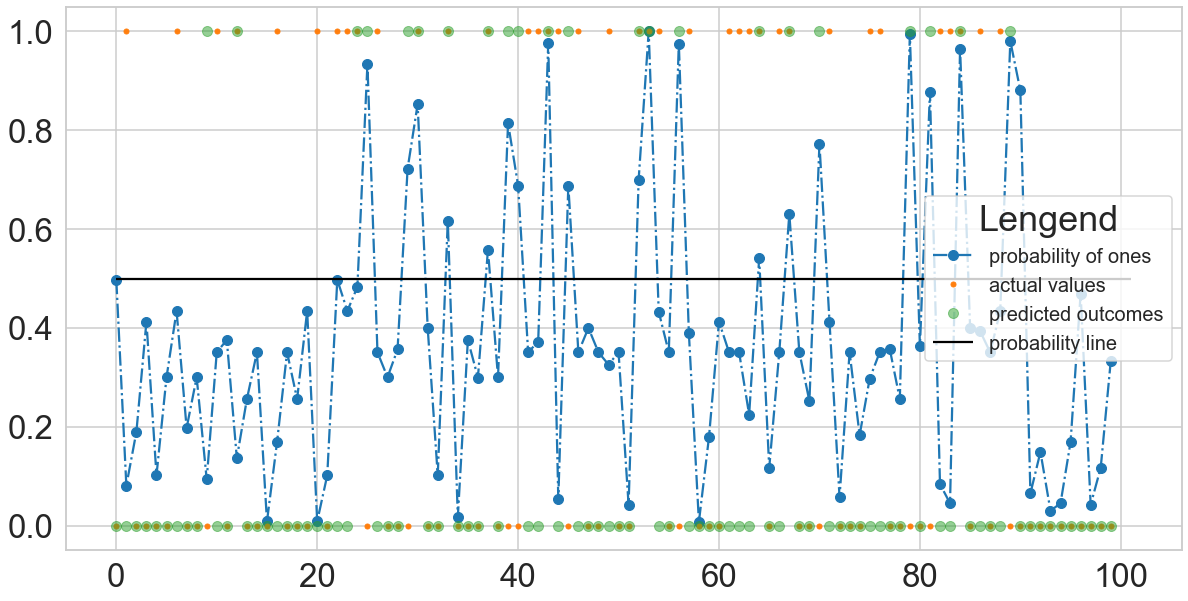

In [54]:
# assigning model use to a vairable 
# we are using the XGBoost model
model= xgb_model[-1]

#calling the function to plot the predictions
ploting(X_test, y_test, model)

This visual shows how the first 100 values of our validation dataset behaves with the actual values
- The model have a accuracy of 66 percent
- From the visual the model predict correctly more `zeros` (false) than true `ones` (True)
- Both XGBoost and Randforest have the same predictive power

In [49]:
sns.set_style('whitegrid')
sns.set_context('talk', font_scale = 2)

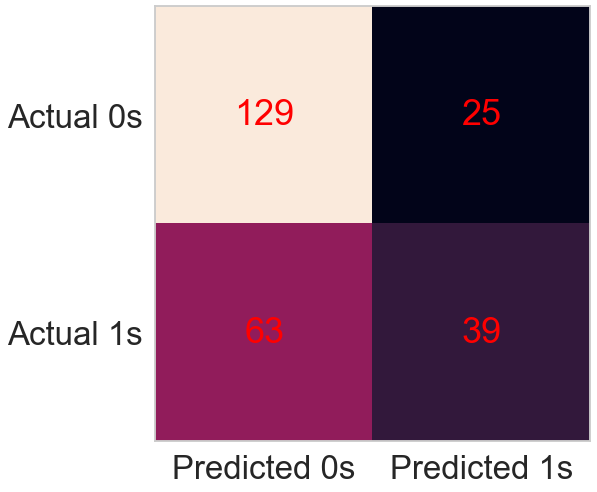

In [50]:
cm = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.savefig('confusing.png', bbox_inches='tight');
plt.show()

From our confusion Matrix, we can gather that there were:
* 129 true negative predictions: There were 129 correctly predicted `zeros` or `false` for the response variable.
* 63 false negative predictions: These are the `ones` wrongly predicted as `zeros`.
* 25 false positive prediction: These are the `zeros` wrongly predicted as `one`.
* 39 true positive predictions: There were 39 correctly predicted `ones` or `true` for the response variable.

In [51]:
# creating a dataframe for our classification report
class_df = pd.DataFrame(classification_report(y_test, model.predict(X_test), output_dict=True))
class_df

,0,1,accuracy,macro avg,weighted avg
precision,0.671875,0.609375,0.65625,0.640625,0.646973
recall,0.837662,0.382353,0.65625,0.610008,0.656250
f1-score,0.745665,0.469880,0.65625,0.607772,0.635782
support,154.000000,102.000000,0.65625,256.000000,256.000000


The DataFrame further explain our model
* Precision for `zeros` (false) is 67% and 61% for `ones` (true)

In [52]:
# Creating a dataframe that shows the whole datset, including the predicted values
comb_df = pd.concat([X_test, y_test], axis=1)
comb_df['predicted'] = model.predict(X_test)
print('\t\t\tThis is a dataframe of X_test including actual target and predicted values')
comb_df

			This is a dataframe of X_test including actual target and predicted values


,Promoted / ticketed events,supervenue,max_standing,total_capcity,U-Shaped_max,Wheelchair accessible,predicted
venue_name,,,,,,,
the joiner on worship,1,0,150,5362,35,0,0
the bloomsbury,0,0,25,590,22,1,0
harrow club w10,0,0,100,3580,35,0,0
mr fogg's tavern,0,0,80,2912,35,0,0
house of mass studio,0,0,40,1512,35,0,0
...,...,...,...,...,...,...,...
narrowboat,0,0,30,1162,35,0,0
the residence at holmes hotel london,1,0,20,812,35,1,1
loop bar,0,0,100,3612,35,0,0


## Summary
* The model is to predict Wheelchair Ramps for event centers<br><br>
    - From the EDA, it was discovered that event center with bigger capacity tends to have Wheelchair Ramps<br><br>
    - Event center that do not qualify as `super venue` tend to have Wheelchair Ramps<br><br>
    - Also event center that hosts `promoted/ticket events` are more likely to have Wheelchair Ramps<br><br>
    - The model uses `1` to represent there is Wheelchair Ramps in a particular `event center` and `0` otherwise<br><br>
    - It was determined that `Promoted / ticketed events`, `max_standing`, `total_capcity`, `supervenue`, `U-Shaped_max` are the best features to predict our target variable `Wheelchair accessible`<br><br>
    - The project settled for XGBoost model, though other model perfomance are fairly similar<br><br>
    - The model can successfully predict `two-thirds` correctly whether a `event/venue` has Wheelchair Ramps or not<br><br> 
